In [1]:
import pandas as pd
import numpy as np
import time
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

accre_df = pd.read_csv('data/fullsample.csv')
accre_df.head()

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,SUBMIT
0,6794220,laxtons,mikala,247808Mn,115217.12M,14-00:00:00,11-01:32:50,1,16,production,0:0,2019-03-09T16:38:44
1,6983193_1880,discovery,serina,12288Mn,6516.10M,13-18:00:00,12-09:26:41,1,1,production,0:0,2019-03-07T18:39:59
2,7055502_1863,discovery,serina,12288Mn,0.09M,13-18:00:00,13-08:27:36,1,1,production,0:0,2019-03-11T10:06:06
3,7055502_1800,discovery,serina,12288Mn,8333.82M,13-18:00:00,12-03:50:59,1,1,production,0:0,2019-03-11T10:06:06
4,7055502_1806,discovery,serina,12288Mn,8304.03M,13-18:00:00,11-08:43:46,1,1,production,0:0,2019-03-11T10:06:06


In [2]:
accre_df.shape

(4365379, 12)

In [3]:
accre_df = accre_df.drop_duplicates(subset='JOBID')
accre_df.shape
accre_df = accre_df.query('PARTITION=="production"')
accre_df.columns = accre_df.columns.str.lower()
accre_df.shape

(3319257, 12)

In [4]:

accre_df['mem_type'] = accre_df['reqmem'].str[-2:]
accre_df.head()

,jobid,account,user,reqmem,usedmem,reqtime,usedtime,nodes,cpus,partition,exitcode,submit,mem_type
0,6794220,laxtons,mikala,247808Mn,115217.12M,14-00:00:00,11-01:32:50,1,16,production,0:0,2019-03-09T16:38:44,Mn
1,6983193_1880,discovery,serina,12288Mn,6516.10M,13-18:00:00,12-09:26:41,1,1,production,0:0,2019-03-07T18:39:59,Mn
2,7055502_1863,discovery,serina,12288Mn,0.09M,13-18:00:00,13-08:27:36,1,1,production,0:0,2019-03-11T10:06:06,Mn
3,7055502_1800,discovery,serina,12288Mn,8333.82M,13-18:00:00,12-03:50:59,1,1,production,0:0,2019-03-11T10:06:06,Mn
4,7055502_1806,discovery,serina,12288Mn,8304.03M,13-18:00:00,11-08:43:46,1,1,production,0:0,2019-03-11T10:06:06,Mn


In [5]:
accre_df['mem_num'] = accre_df['reqmem'].str[:-2]
accre_df['used_num'] = accre_df['usedmem'].str[:-1]
accre_df['mem_num'] = pd.to_numeric(accre_df['mem_num'])
accre_df['used_num'] = pd.to_numeric(accre_df['used_num'])
accre_df.head()

,jobid,account,user,reqmem,usedmem,reqtime,usedtime,nodes,cpus,partition,exitcode,submit,mem_type,mem_num,used_num
0,6794220,laxtons,mikala,247808Mn,115217.12M,14-00:00:00,11-01:32:50,1,16,production,0:0,2019-03-09T16:38:44,Mn,247808,115217.12
1,6983193_1880,discovery,serina,12288Mn,6516.10M,13-18:00:00,12-09:26:41,1,1,production,0:0,2019-03-07T18:39:59,Mn,12288,6516.10
2,7055502_1863,discovery,serina,12288Mn,0.09M,13-18:00:00,13-08:27:36,1,1,production,0:0,2019-03-11T10:06:06,Mn,12288,0.09
3,7055502_1800,discovery,serina,12288Mn,8333.82M,13-18:00:00,12-03:50:59,1,1,production,0:0,2019-03-11T10:06:06,Mn,12288,8333.82
4,7055502_1806,discovery,serina,12288Mn,8304.03M,13-18:00:00,11-08:43:46,1,1,production,0:0,2019-03-11T10:06:06,Mn,12288,8304.03


In [6]:
accre_df['cpu_per_node'] = (accre_df['cpus']/accre_df['nodes'])
accre_df.head()
accre_df['usedmem_per_cpu'] =  accre_df['used_num']/accre_df['cpu_per_node']
accre_df.head()
accre_df = accre_df[accre_df.exitcode == '0:0']
accre_df.head()

,jobid,account,user,reqmem,usedmem,reqtime,usedtime,nodes,cpus,partition,exitcode,submit,mem_type,mem_num,used_num,cpu_per_node,usedmem_per_cpu
0,6794220,laxtons,mikala,247808Mn,115217.12M,14-00:00:00,11-01:32:50,1,16,production,0:0,2019-03-09T16:38:44,Mn,247808,115217.12,16.0,7201.07
1,6983193_1880,discovery,serina,12288Mn,6516.10M,13-18:00:00,12-09:26:41,1,1,production,0:0,2019-03-07T18:39:59,Mn,12288,6516.10,1.0,6516.10
2,7055502_1863,discovery,serina,12288Mn,0.09M,13-18:00:00,13-08:27:36,1,1,production,0:0,2019-03-11T10:06:06,Mn,12288,0.09,1.0,0.09
3,7055502_1800,discovery,serina,12288Mn,8333.82M,13-18:00:00,12-03:50:59,1,1,production,0:0,2019-03-11T10:06:06,Mn,12288,8333.82,1.0,8333.82
4,7055502_1806,discovery,serina,12288Mn,8304.03M,13-18:00:00,11-08:43:46,1,1,production,0:0,2019-03-11T10:06:06,Mn,12288,8304.03,1.0,8304.03


In [7]:
def conversion(row):
    if row['mem_type'] == 'Mn':
        gg = row['mem_num']/row['cpu_per_node']
        return gg
    else:
        return row['mem_num']
    
accre_df['reqmem_per_cpu'] = accre_df.apply(conversion,axis=1)
accre_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3319152 entries, 0 to 4365378
Data columns (total 18 columns):
jobid              object
account            object
user               object
reqmem             object
usedmem            object
reqtime            object
usedtime           object
nodes              int64
cpus               int64
partition          object
exitcode           object
submit             object
mem_type           object
mem_num            int64
used_num           float64
cpu_per_node       float64
usedmem_per_cpu    float64
reqmem_per_cpu     float64
dtypes: float64(4), int64(3), object(11)
memory usage: 481.1+ MB


## Saturdays Work

In [8]:
accre_df2 = accre_df.head(150000)
accre_df2.head()

,jobid,account,user,reqmem,usedmem,reqtime,usedtime,nodes,cpus,partition,exitcode,submit,mem_type,mem_num,used_num,cpu_per_node,usedmem_per_cpu,reqmem_per_cpu
0,6794220,laxtons,mikala,247808Mn,115217.12M,14-00:00:00,11-01:32:50,1,16,production,0:0,2019-03-09T16:38:44,Mn,247808,115217.12,16.0,7201.07,15488.0
1,6983193_1880,discovery,serina,12288Mn,6516.10M,13-18:00:00,12-09:26:41,1,1,production,0:0,2019-03-07T18:39:59,Mn,12288,6516.10,1.0,6516.10,12288.0
2,7055502_1863,discovery,serina,12288Mn,0.09M,13-18:00:00,13-08:27:36,1,1,production,0:0,2019-03-11T10:06:06,Mn,12288,0.09,1.0,0.09,12288.0
3,7055502_1800,discovery,serina,12288Mn,8333.82M,13-18:00:00,12-03:50:59,1,1,production,0:0,2019-03-11T10:06:06,Mn,12288,8333.82,1.0,8333.82,12288.0
4,7055502_1806,discovery,serina,12288Mn,8304.03M,13-18:00:00,11-08:43:46,1,1,production,0:0,2019-03-11T10:06:06,Mn,12288,8304.03,1.0,8304.03,12288.0


In [9]:
# g = accre_df2['usedtime'].apply(lambda x:x.split('-')[-1])
# g2 = accre_df2['usedtime'].apply(lambda x:x.split('-')[0])
# #days = g2.astype('int64')*86400
# g.head()
# h = g.apply(lambda x:x.split(':')[0])
# m = g.apply(lambda x:x.split(':')[1])
# s = g.apply(lambda x:x.split(':')[-1])
# #h.astype('int64')*3600 + m.astype('int64')*60 + s.astype('int64')
accre_df2['usedtime'].apply(len)

0         11
1         11
2         11
3         11
4         11
5         10
6         11
7         11
8         10
9         10
10        10
11        10
12        11
13        11
14        10
15        10
16        11
17        11
18        10
19        10
20        10
21        11
22        11
23        11
24        10
25        11
26        11
27        11
28        11
29        11
          ..
161998     8
161999     8
162000     8
162001     8
162002     8
162003     8
162004     8
162005     8
162006     8
162007     8
162008     8
162009     8
162010     8
162011     8
162012     8
162013     8
162014    10
162016     8
162017     8
162018     8
162019     8
162020     8
162022     8
162023     8
162024     8
162025     8
162026     8
162067     8
162068     8
162069     8
Name: usedtime, Length: 150000, dtype: int64

In [10]:
accre_df2.tail()

,jobid,account,user,reqmem,usedmem,reqtime,usedtime,nodes,cpus,partition,exitcode,submit,mem_type,mem_num,used_num,cpu_per_node,usedmem_per_cpu,reqmem_per_cpu
162025,7540765_197,galangal,osborne,15360Mn,0.09M,16:00:00,02:54:44,1,1,production,0:0,2019-04-04T10:11:55,Mn,15360,0.09,1.0,0.09,15360.0
162026,7541324,fava,clovis,2048Mc,862.44M,12:00:00,00:04:52,1,1,production,0:0,2019-04-04T10:43:01,Mc,2048,862.44,1.0,862.44,2048.0
162067,7539932_20,kumquat,clarence,5120Mc,780.64M,1-15:00:00,00:36:53,1,1,production,0:0,2019-04-04T09:24:40,Mc,5120,780.64,1.0,780.64,5120.0
162068,7539937_10,kumquat,clarence,5120Mc,809.16M,1-15:00:00,00:56:13,1,1,production,0:0,2019-04-04T09:24:40,Mc,5120,809.16,1.0,809.16,5120.0
162069,7540765_198,galangal,osborne,15360Mn,89.21M,16:00:00,02:42:14,1,1,production,0:0,2019-04-04T10:11:55,Mn,15360,89.21,1.0,89.21,15360.0


In [11]:
def time_to_second(sec):
    time = sec.split('-')
    if len(time) == 2:
        day = int(time[0]) * 86400
    else:
        day = 0
    h, m, s = time[-1].split(':')
    day = day+int(h) * 3600
    day = day +int(m)*60
    day = day+ int(s)
    return day


In [12]:
accre_df2['usedtime_sec'] = accre_df2['usedtime'].apply(time_to_second)
accre_df2.head()
accre_df2['reqtime_sec'] = accre_df2['reqtime'].apply(time_to_second)
accre_df2.head()

C:\Users\kenny\.jupyter\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\kenny\.jupyter\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,jobid,account,user,reqmem,usedmem,reqtime,usedtime,nodes,cpus,partition,exitcode,submit,mem_type,mem_num,used_num,cpu_per_node,usedmem_per_cpu,reqmem_per_cpu,usedtime_sec,reqtime_sec
0,6794220,laxtons,mikala,247808Mn,115217.12M,14-00:00:00,11-01:32:50,1,16,production,0:0,2019-03-09T16:38:44,Mn,247808,115217.12,16.0,7201.07,15488.0,955970,1209600
1,6983193_1880,discovery,serina,12288Mn,6516.10M,13-18:00:00,12-09:26:41,1,1,production,0:0,2019-03-07T18:39:59,Mn,12288,6516.10,1.0,6516.10,12288.0,1070801,1188000
2,7055502_1863,discovery,serina,12288Mn,0.09M,13-18:00:00,13-08:27:36,1,1,production,0:0,2019-03-11T10:06:06,Mn,12288,0.09,1.0,0.09,12288.0,1153656,1188000
3,7055502_1800,discovery,serina,12288Mn,8333.82M,13-18:00:00,12-03:50:59,1,1,production,0:0,2019-03-11T10:06:06,Mn,12288,8333.82,1.0,8333.82,12288.0,1050659,1188000
4,7055502_1806,discovery,serina,12288Mn,8304.03M,13-18:00:00,11-08:43:46,1,1,production,0:0,2019-03-11T10:06:06,Mn,12288,8304.03,1.0,8304.03,12288.0,981826,1188000


In [13]:
accre_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 162069
Data columns (total 20 columns):
jobid              150000 non-null object
account            150000 non-null object
user               150000 non-null object
reqmem             150000 non-null object
usedmem            150000 non-null object
reqtime            150000 non-null object
usedtime           150000 non-null object
nodes              150000 non-null int64
cpus               150000 non-null int64
partition          150000 non-null object
exitcode           150000 non-null object
submit             150000 non-null object
mem_type           150000 non-null object
mem_num            150000 non-null int64
used_num           135427 non-null float64
cpu_per_node       150000 non-null float64
usedmem_per_cpu    135427 non-null float64
reqmem_per_cpu     150000 non-null float64
usedtime_sec       150000 non-null int64
reqtime_sec        150000 non-null int64
dtypes: float64(4), int64(5), object(11)
memory us

In [14]:
accre_df['usedtime_sec'] = accre_df['usedtime'].apply(time_to_second)
accre_df.head()
accre_df['reqtime_sec'] = accre_df['reqtime'].apply(time_to_second)
accre_df.head()
accre_df['submit'] = accre_df.submit.replace('T', ' ')
accre_df.head()

,jobid,account,user,reqmem,usedmem,reqtime,usedtime,nodes,cpus,partition,exitcode,submit,mem_type,mem_num,used_num,cpu_per_node,usedmem_per_cpu,reqmem_per_cpu,usedtime_sec,reqtime_sec
0,6794220,laxtons,mikala,247808Mn,115217.12M,14-00:00:00,11-01:32:50,1,16,production,0:0,2019-03-09T16:38:44,Mn,247808,115217.12,16.0,7201.07,15488.0,955970,1209600
1,6983193_1880,discovery,serina,12288Mn,6516.10M,13-18:00:00,12-09:26:41,1,1,production,0:0,2019-03-07T18:39:59,Mn,12288,6516.10,1.0,6516.10,12288.0,1070801,1188000
2,7055502_1863,discovery,serina,12288Mn,0.09M,13-18:00:00,13-08:27:36,1,1,production,0:0,2019-03-11T10:06:06,Mn,12288,0.09,1.0,0.09,12288.0,1153656,1188000
3,7055502_1800,discovery,serina,12288Mn,8333.82M,13-18:00:00,12-03:50:59,1,1,production,0:0,2019-03-11T10:06:06,Mn,12288,8333.82,1.0,8333.82,12288.0,1050659,1188000
4,7055502_1806,discovery,serina,12288Mn,8304.03M,13-18:00:00,11-08:43:46,1,1,production,0:0,2019-03-11T10:06:06,Mn,12288,8304.03,1.0,8304.03,12288.0,981826,1188000


In [15]:
accre_dfnode = accre_df[accre_df.nodes == 1]
accre_dfnode['jobid'].count()
accre_dfnode['account'].value_counts()

clara            441355
kumquat          334770
mixed            285624
mickey           243665
pecans           217509
maltaise         189596
antares          178900
francis          128659
atemoyas         121171
pasilla          103017
galangal          98475
sommerfeld        89071
portabella        88857
almonds           88643
dill              87824
alkmene           81963
pioppino          57893
sweet             54755
strawberries      47084
lemon             43782
flamingo          42595
fava              26235
ingrid            24058
laxtons           21214
seeded            20005
chanterelle       18765
horseradish       17679
winged            15996
fairchild         12691
cepuna            11657
                  ...  
summer               59
carrot               57
mamey                47
blackberries         46
shell                40
regal                38
lollo                34
champagne            33
turban               26
morita               23
bertanne        

## We strongly discourage users from running large numbers (>500) of very short ( < 5 mins )jobs within 4 hours. Are there any users who are repeat offenders?

In [16]:
accre_dfnode['actual_mem'] = (accre_dfnode['usedmem_per_cpu'])/accre_dfnode['reqmem_per_cpu']
accre_dfnode.head()
lg = accre_dfnode[(accre_dfnode.usedtime_sec < 300) & (accre_dfnode.account == 'clara')]
lg['jb'] = lg['jobid'].apply(lambda x:x.split('_')[0])
lg.groupby(['account', 'user'])['jb'].value_counts()

C:\Users\kenny\.jupyter\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\kenny\.jupyter\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


account  user   jb      
clara    gemma  10183388    128
                10183955    128
                10229473    128
                10229474    128
                10229594    128
                10229615    128
                10229622    128
                10229665    128
                10229688    128
                10229691    128
                10229997    128
                10229998    128
                10230030    128
                10230060    128
                10238474    128
                10264355    128
                10264358    128
                10264361    128
                10264370    128
                10264376    128
                10264379    128
                10264382    128
                10264385    128
                10264391    128
                10264406    128
                10449885    128
                10451310    128
                10451319    128
                10451322    128
                10451325    128
               

In [17]:
accre_dfnode['jobid_array'] = accre_dfnode['jobid'].apply(lambda x:x.split('_')[0])
accre_dfnode.describe()
accre_short = accre_dfnode[accre_dfnode['usedtime_sec'] < 300]
accre_short.head()
g = accre_short.groupby(['user','jobid_array'])['jobid'].count()
g = pd.DataFrame(g)
g = g.reset_index()
g = g.sort_values('jobid', ascending=False)
g.tail()
g['jobid_array'] = pd.Categorical(g['jobid_array'])
g = g[g['jobid'] > 500]
g.user.value_counts()
# g_facet = sns.FacetGrid(g, col='user',col_wrap=3,size=5)
# g_facet.map(plt.scatter, 'jobid', 'jobid_array')
# #g_facet.set(xticks=g.jobid_array[0::3]);

C:\Users\kenny\.jupyter\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


tommie      62
boyce       31
brande      22
benson      19
demarcus     7
baylee       7
whitley      6
alf          3
obie         3
lashawn      2
archie       2
tegan        2
hjalmar      2
somer        1
kaye         1
alisson      1
pamelia      1
stefanie     1
jermaine     1
vaughn       1
osborne      1
macey        1
Name: user, dtype: int64

## Question 4

C:\Users\kenny\.jupyter\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\kenny\.jupyter\Anaconda\lib\site-packages\ipykernel_launcher.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


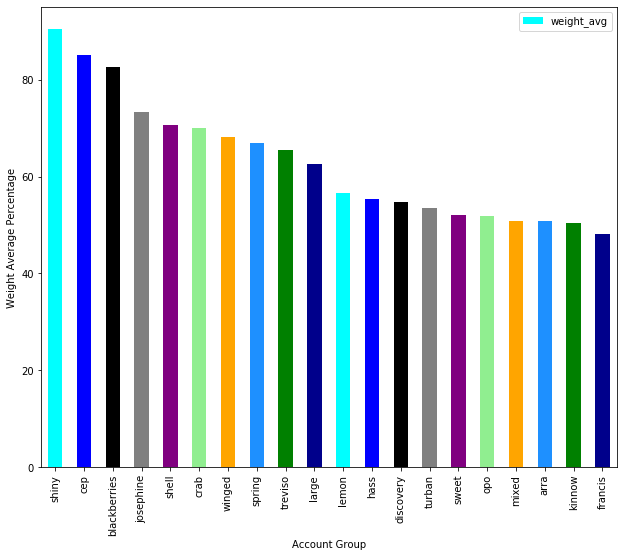

In [18]:
accre_dfnode.head()

accre_dfnode['total'] = accre_dfnode['actual_mem']*accre_dfnode['usedtime_sec']
acc = accre_dfnode.groupby('account')['usedtime_sec'].sum()
acc = acc.reset_index()
acc2 = accre_dfnode.groupby('account')['total'].sum()
#accre_dfnode.head()
acc2 = acc2.reset_index()
total_acc = pd.merge(acc, acc2, on='account')
total_acc.head()
total_acc['weight_avg'] = (total_acc['total']/total_acc['usedtime_sec'])*100
total_acc.head()
total_acc = total_acc[total_acc.account != 'blood']
top10 = total_acc.nlargest(20, 'weight_avg')
ax = plt.figure(figsize=(10, 8))
axes= ax.add_axes([0.1,0.1,0.8,0.8])
top10.plot(kind='bar',x='account', y='weight_avg', color=['cyan', 'blue', 'black', 'grey', 'purple', 'lightgreen', 'orange', 'dodgerblue', 'green', 'darkblue'], ax=axes)
plt.ylabel('Weight Average Percentage')
plt.xlabel('Account Group')
plt.xticks(rotation=90)


# top10 = total_acc.nsmallest(10, 'weight_avg')
# top10.plot(kind='bar',x='account', y='weight_avg', color=['cyan', 'blue', 'black', 'grey', 'purple', 'lightgreen', 'orange', 'dodgerblue', 'green', 'darkblue'])
# plt.ylabel('Weight Average Percentage')
# plt.xlabel('Account Group')
# plt.xticks(rotation=40)

plt.tight_layout()
plt.savefig('top10_memory.png', dpi = 250);

In [32]:
ac = accre_dfnode[accre_dfnode.user == 'boyce']
ag = ac.groupby('jobid_array')['jobid'].count()
ag = ag.reset_index()
ag.jobid.sum()

241569

## Graph of Top 6 Offenders

C:\Users\kenny\.jupyter\Anaconda\lib\site-packages\ipykernel_launcher.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
C:\Users\kenny\.jupyter\Anaconda\lib\site-packages\ipykernel_launcher.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


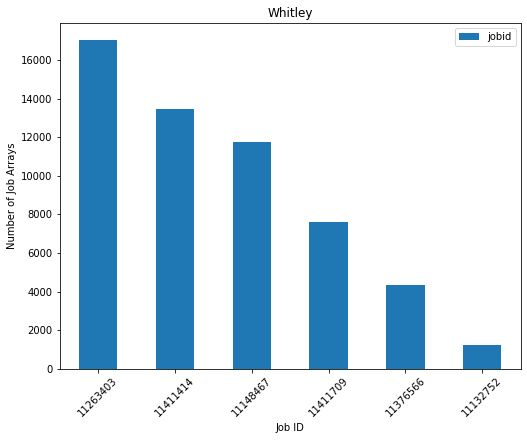

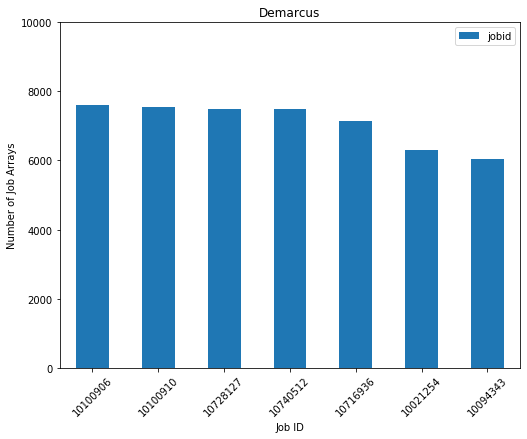

In [20]:
# g_facet = sns.FacetGrid(g, col='user', col_order=['whitley', 'demarcus'],col_wrap=2, size=8)
# g_facet.map(plt.bar, 'jobid_array', 'jobid')
# g_facet.set_xticklabels(rotation=45)
# g_facet.axes[0].set_xlabel('Job ID')
# g_facet.axes[1].set_xlabel('Job ID')
# g_facet.axes[0].set_ylabel('Number of Job Arrays');
#g_facet.set(xticks=g.jobid_array[0::3]);

tg = g[g.user == 'whitley']
ax = plt.figure(figsize=(8, 6))
axes= ax.add_axes([0.1,0.1,0.8,0.8])
tg.plot(kind='bar',x='jobid_array', y='jobid', ax=axes)
plt.xticks(rotation=45)
plt.title('Whitley')
plt.ylabel('Number of Job Arrays')
plt.xlabel('Job ID')
plt.tight_layout()
plt.savefig('top6_whitley.png', dpi = 250)

t = g[g.user == 'demarcus']
ax2 = plt.figure(figsize=(8, 6))
axes2= ax2.add_axes([0.1,0.1,0.8,0.8])
t.plot(kind='bar',x='jobid_array', y='jobid', ax=axes2)
plt.xticks(rotation=45)
plt.ylim([0, 10000])
plt.title('Demarcus')
plt.ylabel('Number of Job Arrays')
plt.xlabel('Job ID')
plt.tight_layout()
plt.savefig('top6_demarcus.png', dpi = 350);

In [ ]:
g[g.user == 'benson'].head()

In [ ]:
# g_facet = sns.FacetGrid(g, col='user', col_order=['benson','brande'],col_wrap=2, size=15)
# g_facet.map(plt.bar, 'jobid_array', 'jobid')
tg = g[g.user == 'benson']
ax = plt.figure(figsize=(8, 6))
axes= ax.add_axes([0.1,0.1,0.8,0.8])
tg.plot(kind='bar',x='jobid_array', y='jobid', ax=axes)
plt.xticks(rotation=90)
plt.title('Benson')
plt.ylabel('Number of Job Arrays')
plt.xlabel('Job ID')
plt.tight_layout()
plt.savefig('top6_benson.png', dpi = 250)

t = g[g.user == 'brande']
ax2 = plt.figure(figsize=(8, 6))
axes2= ax2.add_axes([0.1,0.1,0.8,0.8])
t.plot(kind='bar',x='jobid_array', y='jobid', ax=axes2)
plt.xticks(rotation=90)
plt.title('Brande')
plt.ylim([0, 900])
plt.ylabel('Number of Job Arrays')
plt.xlabel('Job ID')
plt.tight_layout()
plt.savefig('top6_brande.png', dpi = 250);

In [ ]:
tg = g[g.user == 'shiela']

ax = plt.figure(figsize=(10,8))
axes= ax.add_axes([0.1,0.1,0.8,0.8])
tg.plot(kind='bar',x='jobid_array', y='jobid',ax=axes, fontsize=8)
plt.title('Tommie')
plt.xticks(rotation=90)
plt.ylabel('Number of Job Arrays')
plt.xlabel('Job ID')
plt.ylim([0, 1500])
#plt.tight_layout()
#plt.savefig('top6_tommie.png', dpi=250);

In [ ]:
tg = g[g.user == 'boyce']
tg.plot(kind='bar',x='jobid_array', y='jobid')
plt.xticks(rotation=90)
plt.title('Boyce')
plt.ylabel('Number of Job Arrays')
plt.xlabel('Job ID')
plt.tight_layout()
plt.savefig('top6_boyce.png', dpi = 250);

In [ ]:
total_plot = g.groupby('user').value_counts()
total_plot.head()

In [ ]:
g.groupby('user')['jobid'].count()